In [3]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.4/13.3 MB 13.5 MB/s eta 0:00:01
   ------ --------------------------------- 2.2/13.3 MB 28.1 MB/s eta 0:00:01
   ------------ --------------------------- 4.0/13.3 MB 31.9 MB/s eta 0:00:01
   ----------------- ---------------------- 5.9/13.3 MB 34.4 MB/s eta 0:00:01
   ----------------------- ---------------- 7.9/13.3 MB 36.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.9/13.3 MB 37.3 MB/s eta 0:00:01
   ------------------------------- -------- 10.5/13.3 MB 36.4 MB/s eta 0:00:01
   ------------------------------------ --- 12.2/13.3 MB 36.4 MB/s eta 0:00:01
   ------------------------------------ --- 12.2/13.3 MB 36.4 MB/s eta 0:00:01
   -------------------------------------- - 12.8/13.3 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 26.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:

In [412]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

Daily Sunspot Forecast

In [359]:
# Load the dataset
#file_path = '/mnt/data/SN_d_tot_V2.0.csv'  # Replace with monthly/yearly dataset as needed
df = pd.read_csv(r"C:\Users\nirma\Documents\Pace University\Intoduction to Data Science\Projects\Project-3\SN_d_tot_V2.0.csv", delimiter=';', header=None)

In [361]:
# Data Preprocessing
df.columns = ["Year", "Month", "Day", "Date_Fraction", "Sunspot_Number", "Std_Deviation", "Observations", "Definitive"]
df = df[["Year", "Month", "Day", "Sunspot_Number"]]

In [363]:
# Handle missing values (-1 indicates missing)
df = df[df["Sunspot_Number"] != -1]

In [365]:
# Create a datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df[['Date', 'Sunspot_Number']].rename(columns={'Date': 'ds', 'Sunspot_Number': 'y'})

In [367]:
# Determine time unit (daily, monthly, or yearly)
time_unit = 'daily'
if df['ds'].dt.to_period('M').nunique() == len(df):
    time_unit = 'monthly'
elif df['ds'].dt.to_period('Y').nunique() == len(df):
    time_unit = 'yearly'

In [369]:
# Initialize Prophet model
model = Prophet()

In [371]:
# Add custom seasonality
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

In [373]:
# Fit the model
model.fit(df)

22:14:32 - cmdstanpy - INFO - Chain [1] start processing
22:16:50 - cmdstanpy - INFO - Chain [1] done processing


In [382]:
# Predict future values
future_periods = {'daily': 365, 'monthly': 9, 'yearly': 20}
future = model.make_future_dataframe(periods=future_periods[time_unit], freq='D' if time_unit == 'daily' else 'M' if time_unit == 'monthly' else 'Y')
forecast = model.predict(future)

In [384]:
# Evaluate model performance
forecast = forecast.set_index('ds')  # Ensure 'ds' is the date column in `forecast`
actual = df.set_index('ds')['y']  # Ensure 'ds' is the date column in `df`

In [386]:
# Align based on index
#aligned_actual = actual.loc[forecast.index].values
aligned_actual = actual.reindex(forecast.index).values
predicted = forecast['yhat'].values

In [406]:
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

In [408]:
# Print Evaluation Metrics
print(f"Evaluation Metrics for {time_unit.capitalize()} Model:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R2 Score: {r2:.2f}")

Evaluation Metrics for Daily Model:
MAE: 55.28
MAPE: 4796708087768512512.00%
R2 Score: 0.19


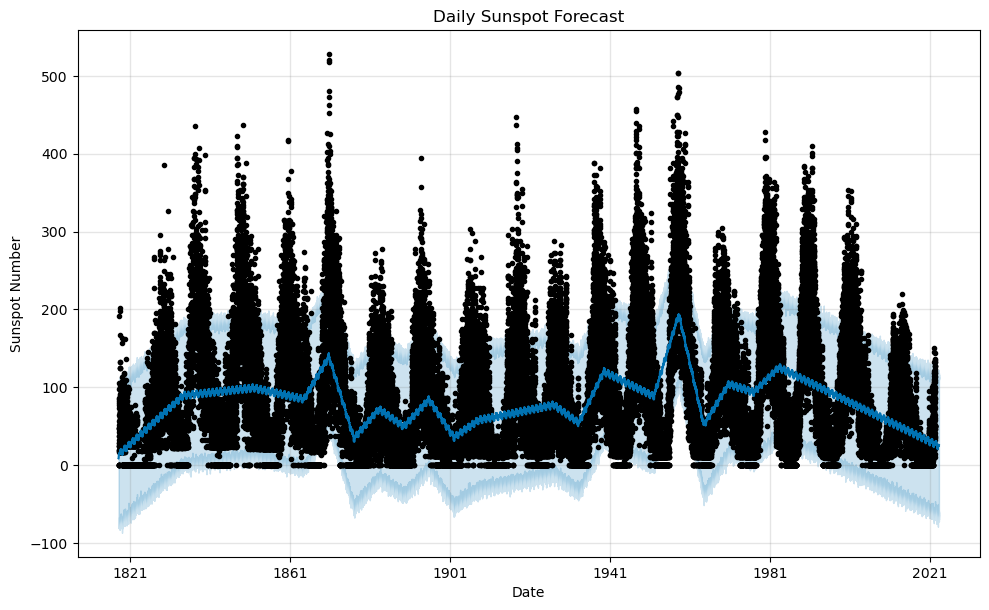

In [425]:
# Plot the forecast
model.plot(forecast)
plt.title(f"Daily Sunspot Forecast")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.show()

Monthly Sunspot Forecast

In [153]:
# Load the dataset
dm = pd.read_csv(r"C:\Users\nirma\Documents\Pace University\Intoduction to Data Science\Projects\Project-3\SN_m_tot_V2.0.csv", delimiter=';', header=None)

In [260]:
print(df.columns)

Index(['ds', 'y'], dtype='object')


In [114]:
# Data Preprocessing
dm.columns = ["Year", "Month", "Date_Fraction", "Sunspot_Number", "Std_Deviation", "Observations", "Definitive"]
dm = dm[["Year", "Month", "Sunspot_Number"]]

In [116]:
# Handle missing values (-1 indicates missing)
dm = dm[dm["Sunspot_Number"] != -1]

In [118]:
# Create a datetime column
dm['Date'] = pd.to_datetime(dm[['Year', 'Month']].assign(Day=1))
dm = dm[['Date', 'Sunspot_Number']].rename(columns={'Date': 'ds', 'Sunspot_Number': 'y'})

In [128]:
# Initialize Prophet model
monthly_model = Prophet()

In [130]:
# Add custom seasonality
monthly_model.add_seasonality(name='yearly', period=12, fourier_order=10)

In [132]:
# Fit the model
monthly_model.fit(dm)

23:07:25 - cmdstanpy - INFO - Chain [1] start processing
23:07:26 - cmdstanpy - INFO - Chain [1] done processing


In [136]:
# Forecast
future_monthly = monthly_model.make_future_dataframe(periods=9, freq='M')
forecast_monthly = monthly_model.predict(future_monthly)

C:\Users\nirma\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [140]:
# Evaluate
m_mae = mean_absolute_error(dm['y'], forecast_monthly['yhat'][:len(dm)])
m_mape = mean_absolute_percentage_error(dm['y'], forecast_monthly['yhat'][:len(dm)])
m_r2 = r2_score(dm['y'], forecast_monthly['yhat'][:len(dm)])

In [262]:
# Print Evaluation Metrics
print(f"Evaluation Metrics for Monthly Model:")
print(f"Monthly MAE: {m_mae:.2f}")
print(f"Monthly MAPE: {m_mape:.2%}")
print(f"Monthly R2 Score: {m_r2:.2f}")

Evaluation Metrics for Monthly Model:
Monthly MAE: 53.29
Monthly MAPE: 657636022826199808.00%
Monthly R2 Score: 0.07


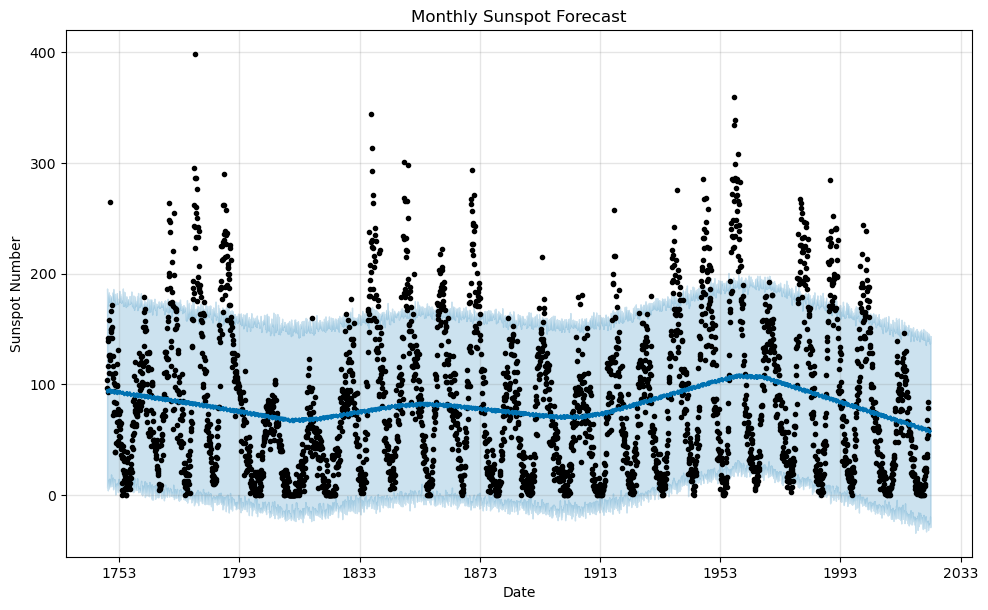

In [240]:
# Plot
monthly_model.plot(forecast_monthly)
plt.title("Monthly Sunspot Forecast")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.show()

Yearly Sunspot Forecast

In [200]:
# Load Yearly Dataset
dy = pd.read_csv(r"C:\Users\nirma\Documents\Pace University\Intoduction to Data Science\Projects\Project-3\SN_y_tot_V2.0.csv", delimiter=';', header=None)

In [264]:
print(yearly_data.columns)
print(len(yearly_data.columns)) 

Index(['Year', 'Sunspot_Number'], dtype='object')
2


In [274]:
#dy.columns = ["Year", "Date_Fraction", "Sunspot_Number", "Std_Deviation", "Observations", "Definitive"]
dy.columns = ["Year", "Sunspot_Number"]  # If `dy` has only 2 columns
dy = dy[["Year","Sunspot_Number"]]

In [276]:
# Handle Missing Values
dy = dy[dy["Sunspot_Number"] != -1]

In [278]:
print(dy.columns)

Index(['Year', 'Sunspot_Number'], dtype='object')


In [280]:
# Create a datetime column
dy['Date'] = pd.to_datetime(dy['Year'].astype(str) + '-01-01')
dy = dy[['Year', 'Sunspot_Number']].rename(columns={'Year': 'ds', 'Sunspot_Number': 'y'})

C:\Users\nirma\AppData\Local\Temp\ipykernel_26996\909507709.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dy['Date'] = pd.to_datetime(dy['Year'].astype(str) + '-01-01')


In [282]:
# Initialize Prophet model
yearly_model = Prophet()

In [284]:
# Add custom seasonality
yearly_model.add_seasonality(name='yearly', period=1, fourier_order=10)

In [286]:
# Fit the model
yearly_model.fit(dy)

22:00:46 - cmdstanpy - INFO - Chain [1] start processing
22:00:46 - cmdstanpy - INFO - Chain [1] done processing


In [288]:
# Forecast
future_yearly = yearly_model.make_future_dataframe(periods=20, freq='Y')
forecast_yearly = yearly_model.predict(future_yearly)

C:\Users\nirma\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [290]:
# Evaluate
y_mae = mean_absolute_error(dy['y'], forecast_yearly['yhat'][:len(dy)])
y_mape = mean_absolute_percentage_error(dy['y'], forecast_yearly['yhat'][:len(dy)])
y_r2 = r2_score(dy['y'], forecast_yearly['yhat'][:len(dy)])

In [292]:
# Print Evaluation Metrics
print(f"Evaluation Metrics for Yearly Model:")
print(f"Yearly MAE: {m_mae:.2f}")
print(f"Yearly MAPE: {m_mape:.2%}")
print(f"Yearly R2 Score: {m_r2:.2f}")

Evaluation Metrics for Yearly Model:
Yearly MAE: 53.29
Yearly MAPE: 657636022826199808.00%
Yearly R2 Score: 0.07


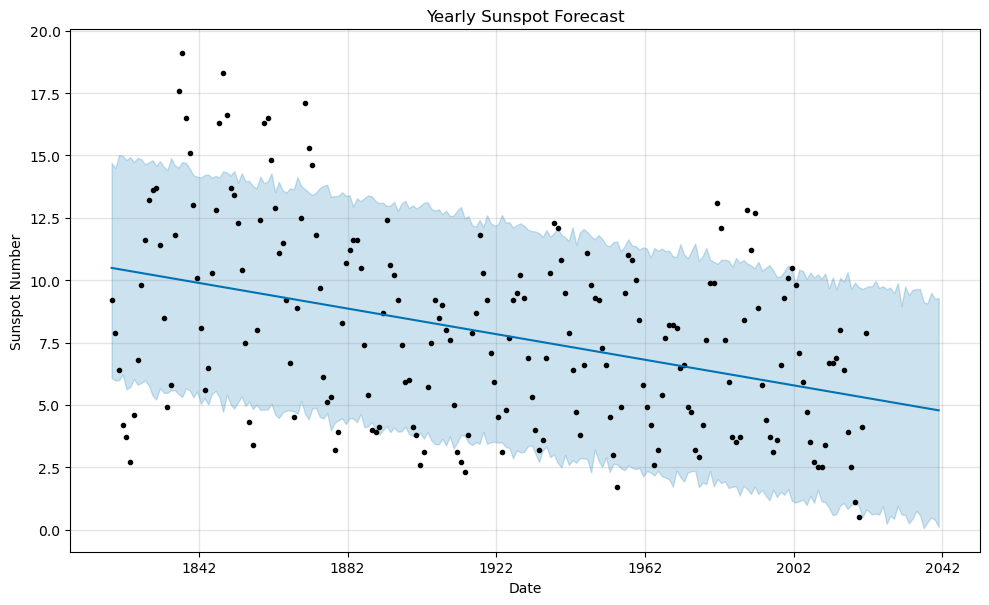

In [294]:
# Plot
yearly_model.plot(forecast_yearly)
plt.title("Yearly Sunspot Forecast")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.show()